In [125]:
import pandas as pd
import random

def read_sample_from(fname, n=1000):
    with open(fname,'r') as f:
        f_len = sum(1 for line in f) - 1
        
    skip = sorted(random.sample(range(1,f_len),f_len-n))
    
    return pd.read_csv(
        fname, 
        low_memory=False, usecols=range(27),
        skiprows=skip
    )

# df = read_sample_from('./data/311_Service_Requests_from_2011.csv', 100000)
df = pd.read_csv('./data/311_Service_Requests_from_2011.csv',  low_memory=False, usecols=range(27) )
print("File read complete: ", len(df), 'rows')

File read complete:  1917212 rows


In [126]:
A = df[['Agency','Borough','Unique Key','Complaint Type', 'Status','Created Date', 'Closed Date']]
A = A[A.Status == 'Closed']
A = A[A['Closed Date'].notnull()]
A['Closed Date'] = pd.to_datetime(A['Closed Date'], format='%m/%d/%Y %H:%M:%S %p')
A['Created Date'] = pd.to_datetime(A['Created Date'], format='%m/%d/%Y %H:%M:%S %p')

In [127]:
import numpy as np

A['Response Time'] = (A['Closed Date'] - A['Created Date']) / np.timedelta64(1, 'h')
print("Response times by hour per agency")
print(A.groupby('Agency').agg({
    'Response Time': ['mean', 'median']
}).sort_values(('Response Time', 'mean')))

Response times by hour per agency
       Response Time        
                mean  median
Agency                      
HRA             0.01    0.01
3-1-1           0.06    0.01
NYPD            3.65    1.49
ACS            22.80   22.80
DHS            92.58   65.94
DFTA           98.51   48.46
DOF           134.45   69.17
DOT           220.11   33.54
DEP           255.15   29.03
HPD           258.70  144.00
DSNY          288.98   57.38
NYCEM         345.22  192.00
DCA           385.66  373.84
FDNY          452.07   39.23
DOHMH         575.84  312.00
DOITT         809.08  670.79
TLC           841.57  549.69
DOE          1289.50  158.54
DOB          1999.58  383.34
DPR          3050.89  151.91
EDC          3099.66 2379.06


Summary of response times for Dept. of Sanitation
       Unique Key  Response Time
count   120462.00      120462.00
mean  20753653.68         288.98
std     813841.51        4864.73
min   19510895.00          -0.98
25%   20036025.25          28.47
50%   20669986.50          57.38
75%   21484232.00         192.23
max   25459372.00     1667045.16


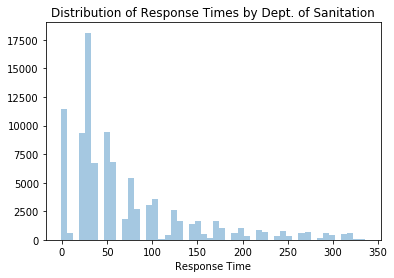

In [128]:
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sanitation_responses = A[A.Agency == 'DSNY']
print("Summary of response times for Dept. of Sanitation")
print(sanitation_responses.describe())

# First, let's plot the values where response is below two weeks.

ax = sns.distplot(
    sanitation_responses[sanitation_responses['Response Time'] < 336]['Response Time'],
    kde=False
)
title = ax.set_title("Distribution of Response Times by Dept. of Sanitation")


In [131]:
sanitation_responses[['Complaint Type', 'Response Time']].groupby('Complaint Type').agg({
    'Response Time': ['mean', 'median']
})

Response Time        
                                           mean  median
Complaint Type                                         
Adopt-A-Basket                            72.46   71.95
Collection Truck Noise                    49.88   31.12
Derelict Bicycle                          60.93   34.19
Dirty Conditions                         248.18   97.18
Graffiti                                1383.19 1133.13
Litter Basket / Request                   52.61   33.87
Missed Collection (All Materials)         49.47   32.80
Other Enforcement                        110.71   50.31
Overflowing Litter Baskets                39.37   29.85
Recycling Enforcement                    411.58  154.27
Sanitation Condition                      48.07   32.00
Snow                                     149.09   57.23
Sweeping/Missed-Inadequate                45.15   31.50
Vacant Lot                               498.56  337.29

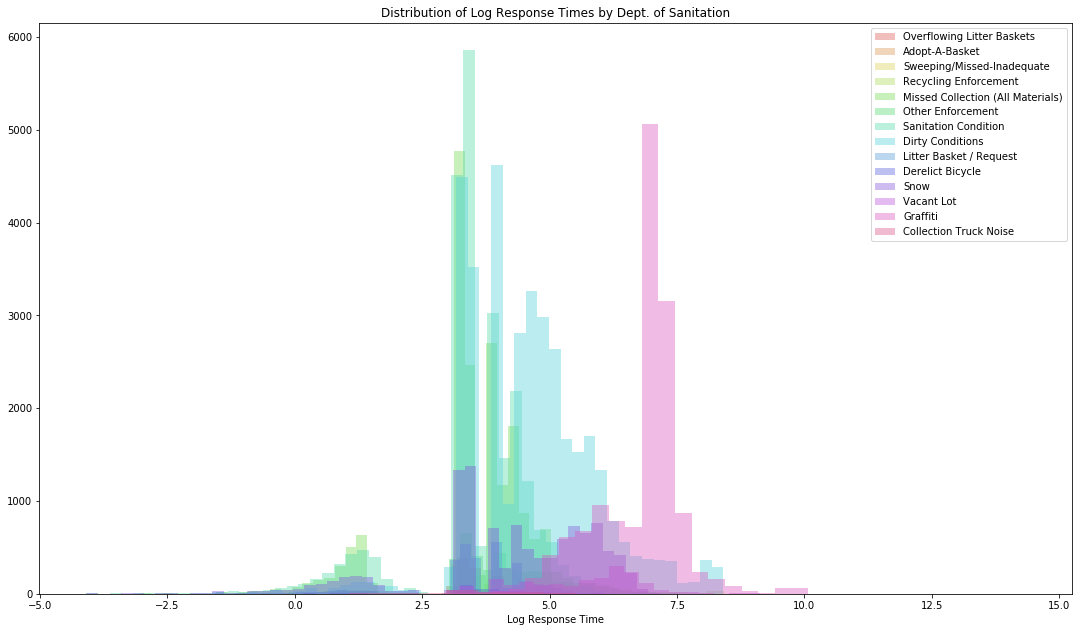

In [151]:
import matplotlib.pyplot as plt

complaint_types = list(set(sanitation_responses['Complaint Type']))
colors = sns.color_palette("hls", len(complaint_types))

for i in range(len(complaint_types)):
    complaint_type = complaint_types[i]
    
    response_gt_0 = sanitation_responses['Response Time'] > 0
    complaint_cat = sanitation_responses['Complaint Type'] == complaint_type 
    filtered = sanitation_responses[response_gt_0 & complaint_cat]

    log_values = np.log(filtered['Response Time'])
    log_values = log_values.rename('Log Response Time')
    ax = sns.distplot(log_values, kde=False, label=complaint_type, color=colors[i])

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
title = ax.set_title("Distribution of Log Response Times by Dept. of Sanitation")

{'Adopt-A-Basket',
 'Collection Truck Noise',
 'Derelict Bicycle',
 'Dirty Conditions',
 'Graffiti',
 'Litter Basket / Request',
 'Missed Collection (All Materials)',
 'Other Enforcement',
 'Overflowing Litter Baskets',
 'Recycling Enforcement',
 'Sanitation Condition',
 'Snow',
 'Sweeping/Missed-Inadequate',
 'Vacant Lot'}